In [ ]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/data.csv')
X = data['X'].values
Y = data['Y'].values


In [ ]:
def initialize_centroids(X, Y, K):
    centroids = []
    for i in range(K):
        index = random.randint(0, len(X) - 1)
        centroids.append((X[index], Y[index]))
    return centroids


In [ ]:
def assign_clusters(X, Y, centroids):
    clusters = [[] for i in range(len(centroids))]
    for i in range(len(X)):
        point = (X[i], Y[i])
        distances = [math.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2)
                     for centroid in centroids]
        nearest_centroid = distances.index(min(distances))
        clusters[nearest_centroid].append(point)
    return clusters

In [ ]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
          centroid_x = sum(point[0] for point in cluster) / len(cluster)
          centroid_y = sum(point[1] for point in cluster) / len(cluster)
          centroids.append((centroid_x, centroid_y))
    return centroids


Enter the value of K: 4


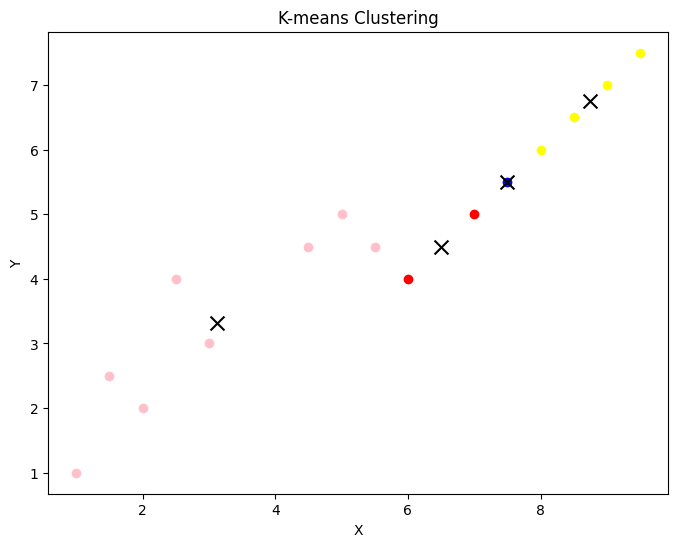

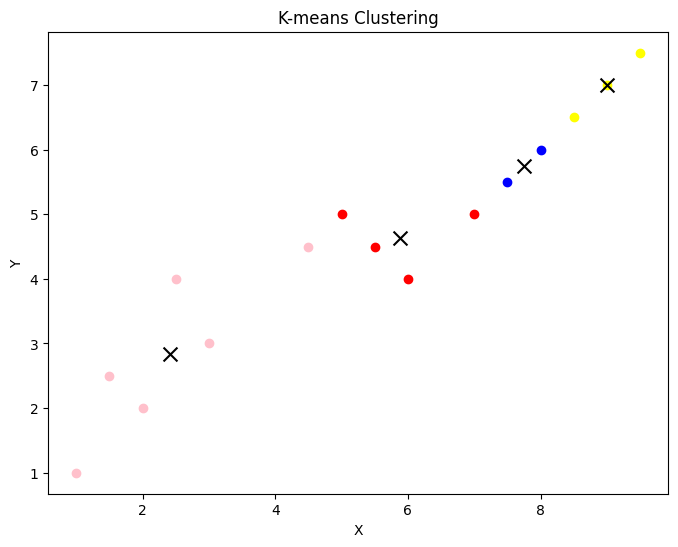

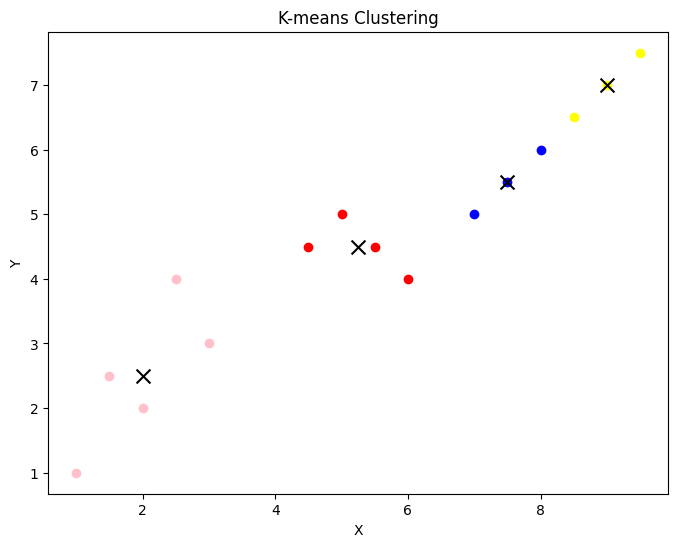

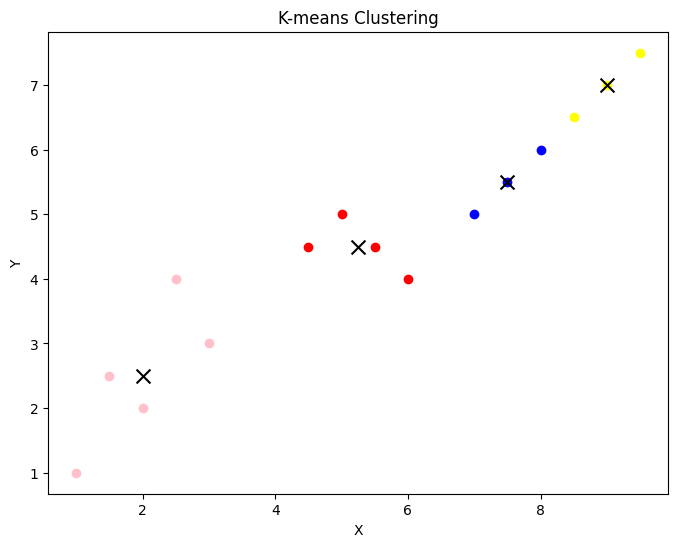

In [ ]:

def k_means_clustering(X, Y, K):
    centroids = initialize_centroids(X, Y, K)
    prev_centroids = []
    while centroids != prev_centroids:
        clusters = assign_clusters(X, Y, centroids)
        prev_centroids = centroids
        centroids = update_centroids(clusters)
        colors = ['red',  'blue', 'pink','yellow',"silver","orange","green","violet","aqua","cyan"]
        plt.figure(figsize=(8, 6))

        counter = 0
        for cluster in clusters:
            for point in cluster:
                plt.scatter(point[0], point[1], c=colors[counter], marker='o')
            counter += 1

        for centroid in centroids:
            # print(centroid)
            plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=100)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('K-means Clustering')
        plt.show()
    return clusters, centroids


K = int(input("Enter the value of K: "))
clusters, centroids = k_means_clustering(X, Y, K)